# Cold start EfficientNetB7-ResidualMLP Neural Architecture Search using hyperband (on CIFAR10 dataset): Best Model Evaluation: 
## Ran task.py with default settings on 2022-02-04
## Here, we evaluate the best model returned from 12 hours of training / search
## The first 2 cells are displaying the NAS task (task.py) which was run and the content of my Python package residualmlp that was used:

In [1]:
! cat task.py

import os
import subprocess
import argparse
# Add parser for common params

try:
    import pendulum
except ModuleNotFoundError as not_found:
    print("We're missing a module:")
    print(not_found)
    print("No problem, we install it...")
    subprocess.run("pip3 install pendulum", 
    	           shell=True, 
    	           check=True)
    import pendulum

try:
    import pandas as pd
except ModuleNotFoundError as not_found:
    print("We're missing a module:")
    print(not_found)
    print("No problem, we install it...")
    subprocess.run("pip3 install pandas", 
    	           shell=True, 
    	           check=True)
    import pandas as pd

try:
    import keras_tuner as kt
except ModuleNotFoundError as not_found:
    print("We're missing a module:")
    print(not_found)
    print("No problem, we install it...")
    subprocess.run("pip3 install keras_tuner", 
    	           shell=True, 
    	           check=True)
    import keras_tuner as kt


try:
    import tensorflow as

In [2]:
! cat residualmlp/residual_mlp.py

try:
    import keras_tuner as kt
except Exception as exc:
    print("Importing Keras tuner appears to be unsuccesful. "
          "keras tuner may need to be installed $ pip install -q -U "
          "keras-tuner. The auto-ml features are disabled until this is "
           "fixed, but ResidualMLP will work. A more detailed error is: "
           f"{exc}")
import tensorflow as tf
import numpy as np
import pandas as pd
import pendulum

# Becomes a layer to convert BW images to RGB

class ResidualMLP:
    
    def __init__(self, problem_type = 'classification',
                      learning_rate = .0007,
                      minimum_learning_rate = 0.00007,
                      maximum_learning_rate = 0.7,
                      number_of_learning_rates_to_try = 5,
                      input_shape = (32,32,3),
                      bw_images = False,
                      base_model = '',
                      base_model_input_shape = (600,600,3),
                      base_model_hyp

## Re-create the environment where the training task was run, so we can evaluate the best model on the CIFAR10 test set.

In [3]:
! pip3 install matplotlib
! pip3 install numpy
import os
import subprocess
import argparse
# Add parser for common params

try:
    import pendulum
except ModuleNotFoundError as not_found:
    print("We're missing a module:")
    print(not_found)
    print("No problem, we install it...")
    subprocess.run("pip3 install pendulum", 
    	           shell=True, 
    	           check=True)
    import pendulum

try:
    import pandas as pd
except ModuleNotFoundError as not_found:
    print("We're missing a module:")
    print(not_found)
    print("No problem, we install it...")
    subprocess.run("pip3 install pandas", 
    	           shell=True, 
    	           check=True)
    import pandas as pd

try:
    import keras_tuner as kt
except ModuleNotFoundError as not_found:
    print("We're missing a module:")
    print(not_found)
    print("No problem, we install it...")
    subprocess.run("pip3 install keras_tuner", 
    	           shell=True, 
    	           check=True)
    import keras_tuner as kt


try:
    import tensorflow as tf
except ModuleNotFoundError as not_found:
    print("We're missing a module:")
    print(not_found)
    print("No problem, we install it...")
    subprocess.run("pip3 install tensorflow", 
    	           shell=True, 
    	           check=True)
    import tensorflow as tf

from residualmlp.residual_mlp import ResidualMLP

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [4]:
cifar = tf.keras.datasets.cifar10.load_data()
(x_train, y_train), (x_test, y_test) = cifar

y_train_ohe = tf.one_hot([i[0] for i in  y_train],10)
indexes_for_rows = tf.range(0,y_train.shape[0])
shuffled_indexes = tf.random.shuffle(indexes_for_rows)
# selected_indexes = shuffled_indexes[:TRAINING_SET_SIZE]
# selected_x_train = x_train[selected_indexes,:,:,:]
# selected_y_train_ohe = y_train_ohe.numpy()[selected_indexes,:]


2022-02-09 01:09:21.465624: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-09 01:09:21.473992: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-09 01:09:21.474833: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-09 01:09:21.476873: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-09 01:09:21.477715: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read f

In [5]:
y_test_ohe = tf.one_hot([i[0] for i in y_test],10)

### Below is copied and pasted from task.py to re-instantiate the default settings used for the original ResidualMLP object used to run the NAS, when task.py was run. (... even though we are not running this as a script and it otherwise doesn't make sense why I have argparse content here... It is just  a shortcut to get the same global default settings back.)

In [6]:

parser = argparse.ArgumentParser()

parser.add_argument(
    "--project_name", type=str, 
    help="Name for this project.",
    default="CIFAR10_EfficientNetB7-ResidualMLP_NAS_AUGMENTED_SPACE")

parser.add_argument(
    "--training_set_size", 
    type=int,
    help="Training set size (how many observations).",
    default=50000)

parser.add_argument(
    "--patience",
    type=int,
    help="How many epochs with no improved performance before the "
        "early stopping callback stops further training?",
    default=25)

parser.add_argument(
    "--patience_min_delta",
    type=float,
    help="How sensitive should the early stopping callback be"
        "  to change?",
    default=0.00001)

parser.add_argument(
    "--batch_size",
    type=int,
    help="How many observations to train with...",
    default=50)

parser.add_argument(
    "--max_epochs",
    type=int,
    help="max_epochs: Integer, the maximum number of epochs to train one "
         "model. It is recommended to set this to a value slightly higher "
         "than the expected epochs to convergence for your largest Model, "
         "and to use early stopping during training (for example, via .",
         default=50)

parser.add_argument(
        "--minimum_learning_rate",
        type=float,
        help="Lowest learning rate to try?",
        default = 0.00007)

parser.add_argument(
        "--maximum_learning_rate",
        type=float,
        help="Highest learning rate to try?",
        default = 0.7)

parser.add_argument(
        "--number_of_learning_rates_to_try",
        type=int,
        help="How many learning rate to try (maximum)?",
        default = 7)

parser.add_argument(
        "--minimum_number_of_blocks",
        type=int,
        help="Minimum number of ResidualMLP blocks in neural architectures "
             "to try?",
        default = 1)

parser.add_argument(
        "--maximum_number_of_blocks",
        type=int,
        help="Maximum number of ResidualMLP blocks in neural architectures "
              "to try?",
        default = 8)


parser.add_argument(
        "--minimum_number_of_layers_per_block",
        type=int,
        help="Minimum number of layers to try in each ResidualMLP block in "
             "the neural architectures to try?",
        default = 1)

parser.add_argument(
        "--maximum_number_of_layers_per_block",
        type=int,
        help="Maximum number of layers to try in each ResidualMLP block in "
             "the neural architectures to try?",
        default = 8)

parser.add_argument(
        "--minimum_neurons_per_block_layer",
        type=int,
        help="Minimum number of neurons to try in the Dense layers in "
             "each ResidualMLP block in the neural architectures to tried?",
        default = 30)

parser.add_argument(
        "--maximum_neurons_per_block_layer",
        type=int,
        help="Maximum number of neurons to try in the Dense layers in "
             "each ResidualMLP block in the neural architectures to tried?",
        default = 130)

parser.add_argument(
        "--n_options_of_neurons_per_layer_to_try",
        type=int,
        help="How many different numbers of neurons (at most) to try in "
             "the Dense layers try in each ResidualMLP block in the neural "
             "architectures to tried?",
        default = 7)

parser.add_argument(
        "--minimum_neurons_per_block_layer_decay",
        type=int,
        help="Lowest decay in number of neurons (n less neurons than the "
             "last layer) to try in the Dense layers try in each "
             "ResidualMLP block in the neural "
             "architectures to tried?",
        default = 0)

parser.add_argument(
        "--maximum_neurons_per_block_layer_decay",
        type=int,
        help="Highest decay in number of neurons (n less neurons than the "
             "last layer) to try in the Dense layers try in each "
             "ResidualMLP block in the neural "
             "architectures to tried?",
        default = 50)

parser.add_argument(
        "--minimum_dropout_rate_for_bypass_layers",
        type=float,
        help="Lowest dropout rate to try for dropout layers located in "
             "residual byass layers?",
        default = 0.01)

parser.add_argument(
        "--maximim_dropout_rate_for_bypass_layers",
        type=float,
        help="Highest dropout rate to try for dropout layers located in "
             "residual byass layers?",
        default = 0.7)

parser.add_argument(
        "--n_options_dropout_rate_for_bypass_layers",
        type=int,
        help="How many dropout rates to try for dropout layers located in "
             "residual byass layers?",
        default = 7)

parser.add_argument(
        "--minimum_inter_block_layers_per_block",
        type=int,
        help="Minimum number of neurons per Dense layer for Dense layers "
             "inserted between ResidualMLP blocks? 0 Will not insert a "
             "layer if selected.",
        default = 0)

parser.add_argument(
        "--maximum_inter_block_layers_per_block",
        type=int,
        help="Maximum number of neurons per Dense layer for Dense layers "
             "inserted between ResidualMLP blocks? 0 Will not insert a "
             "layer if selected.",
        default = 150)

parser.add_argument(
        "--n_options_inter_block_layers_per_block",
        type=int,
        help="How many different numbers of neurons per Dense layer for "
             "Dense layers inserted between ResidualMLP blocks will we try "
             "(at most)?",
        default = 7)

parser.add_argument(
        "--minimum_dropout_rate",
        type=float,
        help="Minimum dropout rate for final Dense layers?",
        default = 0.01)

parser.add_argument(
        "--maximum_dropout_rate",
        type=float,
        help="Maximum dropout rate for final Dense layers?",
        default = 0.7)

parser.add_argument(
        "--n_options_dropout_rate",
        type=int,
        help="How many dropout rates (at max) to try for final Dense layers?",
        default = 7)

parser.add_argument(
        "--minimum_final_dense_layers",
        type=int,
        help="Lowest number of neurons to try for final Dense layers, after "
             "the last ResidualMLP block, before the very last Dense layer "
             "returning an output? "
             "(0 doesn't create a layer')",
        default = 0)

parser.add_argument(
        "--maximum_final_dense_layers",
        type=int,
        help="Highest number of neurons to try for final Dense layers, after "
             "the last ResidualMLP block, before the very last Dense layer "
             "returning an output? "
             "(0 doesn't create a layer')",
        default = 150)

parser.add_argument(
        "--n_options_final_dense_layers",
        type=int,
        help="How many options for neurons to try for final Dense layers, "
             "after the last ResidualMLP block, before the very last "
             "Dense layer returning an output?",
        default = 7)



args, _ = parser.parse_known_args()
hparams = args.__dict__

# Boilerplate args

DATE = pendulum.now().__str__()[:16].replace("T","_").replace(":","_")
PROJECT_NAME = hparams["project_name"]
TRAINING_SET_SIZE = hparams["training_set_size"]

# Keras tuner search & fit args

PATIENCE = hparams["patience"]
PATIENCE_MIN_DELTA = hparams["patience_min_delta"]
BATCH_SIZE = hparams["batch_size"]
MAX_EPOCHS = hparams["max_epochs"]
RESULTS_DIR_FOR_SEARCH =\
    f'{DATE}_{PROJECT_NAME}_SEARCH_RUN'


# Base model args

BASE_MODEL_INPUT_SHAPE = (600,600,3)

# ResidualMLP model args

MINIMUM_LEARNING_RATE = hparams["minimum_learning_rate"]
MAXIMUM_LEARNING_RATE = hparams["maximum_learning_rate"]
NUMBER_OF_LEARNING_RATES_TO_TRY = hparams["number_of_learning_rates_to_try"]
MINIMUM_NUMBER_OF_BLOCKS = hparams["minimum_number_of_blocks"]
MAXIMUM_NUMBER_OF_BLOCKS = hparams["maximum_number_of_blocks"]
MINIMUM_NUMBER_OF_LAYERS_PER_BLOCK =\
    hparams["minimum_number_of_layers_per_block"]
MAXIMUM_NUMBER_OF_LAYERS_PER_BLOCK =\
    hparams["maximum_number_of_layers_per_block"]
MINIMUM_NEURONS_PER_BLOCK_LAYER = hparams["minimum_neurons_per_block_layer"]
MAXIMUM_NEURONS_PER_BLOCK_LAYER = hparams["maximum_neurons_per_block_layer"]
N_OPTIONS_OF_NEURONS_PER_LAYER_TO_TRY =\
    hparams["n_options_of_neurons_per_layer_to_try"]
MINIMUM_NEURONS_PER_BLOCK_LAYER_DECAY =\
    hparams["minimum_neurons_per_block_layer_decay"]
MAXIMUM_NEURONS_PER_BLOCK_LAYER_DECAY =\
    hparams["maximum_neurons_per_block_layer_decay"]
MINIMUM_DROPOUT_RATE_FOR_BYPASS_LAYERS =\
    hparams["minimum_dropout_rate_for_bypass_layers"]
MAXIMIM_DROPOUT_RATE_FOR_BYPASS_LAYERS =\
    hparams["maximim_dropout_rate_for_bypass_layers"]
N_OPTIONS_DROPOUT_RATE_FOR_BYPASS_LAYERS =\
    hparams["n_options_dropout_rate_for_bypass_layers"]
MINIMUM_INTER_BLOCK_LAYERS_PER_BLOCK =\
    hparams["minimum_inter_block_layers_per_block"]
MAXIMUM_INTER_BLOCK_LAYERS_PER_BLOCK =\
    hparams["maximum_inter_block_layers_per_block"]
N_OPTIONS_INTER_BLOCK_LAYERS_PER_BLOCK =\
    hparams["n_options_inter_block_layers_per_block"]
MINIMUM_DROPOUT_RATE = hparams["minimum_dropout_rate"]
MAXIMUM_DROPOUT_RATE = hparams["maximum_dropout_rate"]
N_OPTIONS_DROPOUT_RATE = hparams["n_options_dropout_rate"]
MINIMUM_FINAL_DENSE_LAYERS = hparams["minimum_final_dense_layers"]
MAXIMUM_FINAL_DENSE_LAYERS = hparams["maximum_final_dense_layers"]
N_OPTIONS_FINAL_DENSE_LAYERS = hparams["n_options_final_dense_layers"]

In [7]:
print(f"Date: {DATE}")
print(f"project_name: {PROJECT_NAME}")
print(f"training_set_size: {TRAINING_SET_SIZE}")
print(f"patience: {PATIENCE}")
print(f"PATIENCE_MIN_DELTA: {PATIENCE_MIN_DELTA}")
print(f"BATCH_SIZE: {BATCH_SIZE}")
print(f"MAX_EPOCHS: {MAX_EPOCHS}")
print(f"RESULTS_DIR_FOR_SEARCH: {RESULTS_DIR_FOR_SEARCH}")
print(f"MINIMUM_LEARNING_RATE {MINIMUM_LEARNING_RATE}")
print(f"MAXIMUM_LEARNING_RATE: {MAXIMUM_LEARNING_RATE}")
print(f"NUMBER_OF_LEARNING_RATES_TO_TRY: {NUMBER_OF_LEARNING_RATES_TO_TRY}")
print(f"MINIMUM_NUMBER_OF_BLOCKS: {MINIMUM_NUMBER_OF_BLOCKS}")
print(f"MAXIMUM_NUMBER_OF_BLOCKS: {MAXIMUM_NUMBER_OF_BLOCKS}")
print("MINIMUM_NUMBER_OF_LAYERS_PER_BLOCK: "
      f"{MINIMUM_NUMBER_OF_LAYERS_PER_BLOCK}")
print("MAXIMUM_NUMBER_OF_LAYERS_PER_BLOCK: "
      f"{MAXIMUM_NUMBER_OF_LAYERS_PER_BLOCK}")
print(f"MINIMUM_NEURONS_PER_BLOCK_LAYER: {MINIMUM_NEURONS_PER_BLOCK_LAYER}")
print(f"MAXIMUM_NEURONS_PER_BLOCK_LAYER: {MAXIMUM_NEURONS_PER_BLOCK_LAYER}")
print("N_OPTIONS_OF_NEURONS_PER_LAYER_TO_TRY: "
      f"{N_OPTIONS_OF_NEURONS_PER_LAYER_TO_TRY}")
print("MINIMUM_NEURONS_PER_BLOCK_LAYER_DECAY: "
      f"{MINIMUM_NEURONS_PER_BLOCK_LAYER_DECAY}")
print("MAXIMUM_NEURONS_PER_BLOCK_LAYER_DECAY: "
      f"{MAXIMUM_NEURONS_PER_BLOCK_LAYER_DECAY}")
print("MINIMUM_DROPOUT_RATE_FOR_BYPASS_LAYERS: "
      f"{MINIMUM_DROPOUT_RATE_FOR_BYPASS_LAYERS}")
print("MAXIMIM_DROPOUT_RATE_FOR_BYPASS_LAYERS: "
      f"{MAXIMIM_DROPOUT_RATE_FOR_BYPASS_LAYERS}")
print("N_OPTIONS_DROPOUT_RATE_FOR_BYPASS_LAYERS: "
      f"{N_OPTIONS_DROPOUT_RATE_FOR_BYPASS_LAYERS}")
print("MINIMUM_INTER_BLOCK_LAYERS_PER_BLOCK: "
      f"{MINIMUM_INTER_BLOCK_LAYERS_PER_BLOCK}")
print("MAXIMUM_INTER_BLOCK_LAYERS_PER_BLOCK: "
      f"{MAXIMUM_INTER_BLOCK_LAYERS_PER_BLOCK}")
print("N_OPTIONS_INTER_BLOCK_LAYERS_PER_BLOCK: "
      f"{N_OPTIONS_INTER_BLOCK_LAYERS_PER_BLOCK}")
print(f"MINIMUM_DROPOUT_RATE: {MINIMUM_DROPOUT_RATE}")
print(f"MAXIMUM_DROPOUT_RATE: {MAXIMUM_DROPOUT_RATE}")
print(f"N_OPTIONS_DROPOUT_RATE: {N_OPTIONS_DROPOUT_RATE}")
print(f"MINIMUM_FINAL_DENSE_LAYERS: {MINIMUM_FINAL_DENSE_LAYERS}")
print(f"MAXIMUM_FINAL_DENSE_LAYERS: {MAXIMUM_FINAL_DENSE_LAYERS}")
print(f"N_OPTIONS_FINAL_DENSE_LAYERS: {N_OPTIONS_FINAL_DENSE_LAYERS}")

Date: 2022-02-09_01_09
project_name: CIFAR10_EfficientNetB7-ResidualMLP_NAS_AUGMENTED_SPACE
training_set_size: 50000
patience: 25
PATIENCE_MIN_DELTA: 1e-05
BATCH_SIZE: 50
MAX_EPOCHS: 50
RESULTS_DIR_FOR_SEARCH: 2022-02-09_01_09_CIFAR10_EfficientNetB7-ResidualMLP_NAS_AUGMENTED_SPACE_SEARCH_RUN
MINIMUM_LEARNING_RATE 7e-05
MAXIMUM_LEARNING_RATE: 0.7
NUMBER_OF_LEARNING_RATES_TO_TRY: 7
MINIMUM_NUMBER_OF_BLOCKS: 1
MAXIMUM_NUMBER_OF_BLOCKS: 8
MINIMUM_NUMBER_OF_LAYERS_PER_BLOCK: 1
MAXIMUM_NUMBER_OF_LAYERS_PER_BLOCK: 8
MINIMUM_NEURONS_PER_BLOCK_LAYER: 30
MAXIMUM_NEURONS_PER_BLOCK_LAYER: 130
N_OPTIONS_OF_NEURONS_PER_LAYER_TO_TRY: 7
MINIMUM_NEURONS_PER_BLOCK_LAYER_DECAY: 0
MAXIMUM_NEURONS_PER_BLOCK_LAYER_DECAY: 50
MINIMUM_DROPOUT_RATE_FOR_BYPASS_LAYERS: 0.01
MAXIMIM_DROPOUT_RATE_FOR_BYPASS_LAYERS: 0.7
N_OPTIONS_DROPOUT_RATE_FOR_BYPASS_LAYERS: 7
MINIMUM_INTER_BLOCK_LAYERS_PER_BLOCK: 0
MAXIMUM_INTER_BLOCK_LAYERS_PER_BLOCK: 150
N_OPTIONS_INTER_BLOCK_LAYERS_PER_BLOCK: 7
MINIMUM_DROPOUT_RATE: 0.01
MAXI

### We instantiate an EfficientNetB7-ResidualMLP model: 
1. Start with the EfficientNetB7 model, previously trained on the ImageNet dataset. 
2. We remove the final Dense and BatchNormalization layers after the last Conv2d layer from it. 
3. We set the last Conv2D layer to trainable and set all other layers to not trainable.  
4. We pass the output of this EfficientNetB7 model to a ResidualMLP model configured with with variable and hyperparameterized neural architecture. The method ResidualMLP.build_auto_residual_mlp() parses all permutations of residual MLP neural architecture within the limits chosen (number of residual blocks, number of layers per block, number of dense units per layer, decay in number of dense units layers per subseuent layer ... etc) then creates an ordered list of block architectures, ordered in ascending model complexity. The choice of architecture is then treated as a hyperparameter to the model by the hyperband as it searches for the optimal model. 
5. We set the hyperparameter search space and neural architecture search space to be explored.

In [8]:
mod_with_fc_raw = tf.keras.applications.efficientnet.EfficientNetB7(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape = BASE_MODEL_INPUT_SHAPE, pooling='max', classes=1000
)

# Make the deepest conv2d layer trainable, leave everything else
# as not trainable
for layer in mod_with_fc_raw.layers:
    layer.trainable = False
# Last conv2d layer. This we want to train .
mod_with_fc_raw.layers[-6].trainable = True

# Create the final base model
# (remove the final Dense and BatchNormalization layers ...) 
efficient_net_b_7_transferable_base_model =\
    tf.keras.Model(inputs=mod_with_fc_raw.layers[0].input, 
                    outputs=mod_with_fc_raw.layers[-3].output)

model_builder = ResidualMLP(
                    problem_type= "classification",  
                    minimum_learning_rate = MINIMUM_LEARNING_RATE, 
                    maximum_learning_rate = MAXIMUM_LEARNING_RATE, 
                    number_of_learning_rates_to_try =
                        NUMBER_OF_LEARNING_RATES_TO_TRY, 
                    input_shape = (32,32,3), 
                    bw_images = False, 
                    base_model = 
                        efficient_net_b_7_transferable_base_model, 
                    base_model_input_shape = BASE_MODEL_INPUT_SHAPE, 
                    flatten_after_base_model = False, 
                    minimum_number_of_blocks = MINIMUM_NUMBER_OF_BLOCKS, 
                    maximum_number_of_blocks = MAXIMUM_NUMBER_OF_BLOCKS, 
                    minimum_number_of_layers_per_block =
                        MINIMUM_NUMBER_OF_LAYERS_PER_BLOCK, 
                    maximum_number_of_layers_per_block =
                        MAXIMUM_NUMBER_OF_LAYERS_PER_BLOCK,
                    minimum_neurons_per_block_layer =
                        MINIMUM_NEURONS_PER_BLOCK_LAYER, 
                    maximum_neurons_per_block_layer =
                        MAXIMUM_NEURONS_PER_BLOCK_LAYER, 
                    n_options_of_neurons_per_layer_to_try =
                        N_OPTIONS_OF_NEURONS_PER_LAYER_TO_TRY, 
                    minimum_neurons_per_block_layer_decay =
                        MINIMUM_NEURONS_PER_BLOCK_LAYER_DECAY, 
                    maximum_neurons_per_block_layer_decay = 
                        MAXIMUM_NEURONS_PER_BLOCK_LAYER_DECAY, 
                    minimum_dropout_rate_for_bypass_layers =
                        MINIMUM_DROPOUT_RATE_FOR_BYPASS_LAYERS, 
                    maximim_dropout_rate_for_bypass_layers =
                        MAXIMIM_DROPOUT_RATE_FOR_BYPASS_LAYERS, 
                    n_options_dropout_rate_for_bypass_layers =
                        N_OPTIONS_DROPOUT_RATE_FOR_BYPASS_LAYERS,
                    minimum_inter_block_layers_per_block =
                        MINIMUM_INTER_BLOCK_LAYERS_PER_BLOCK, 
                    maximum_inter_block_layers_per_block =
                        MAXIMUM_INTER_BLOCK_LAYERS_PER_BLOCK,
                    n_options_inter_block_layers_per_block =\
                        N_OPTIONS_INTER_BLOCK_LAYERS_PER_BLOCK,
                    minimum_dropout_rate = MINIMUM_DROPOUT_RATE, 
                    maximum_dropout_rate = MAXIMUM_DROPOUT_RATE,
                    n_options_dropout_rate = N_OPTIONS_DROPOUT_RATE, 
                    minimum_final_dense_layers =
                        MINIMUM_FINAL_DENSE_LAYERS,
                    maximum_final_dense_layers =
                        MAXIMUM_FINAL_DENSE_LAYERS, 
                    n_options_final_dense_layers =
                        N_OPTIONS_FINAL_DENSE_LAYERS, 
                    number_of_classes = 10,
                    final_activation = tf.keras.activations.softmax)

## We restore the hyperband tuner used in task.py and view the summary of results of the Neural Architecture Search and hyperparameter search:

In [9]:

DATE = pendulum.now().__str__()[:16].replace("T","_").replace(":","_")



RESULTS_DIR_FOR_SEARCH =\
    f'{DATE}_{PROJECT_NAME}_SEARCH_RUN'

logdir_for_search = os.path.join("logs", RESULTS_DIR_FOR_SEARCH + "_TB")
tensorboard_callback_search =\
    tf.keras.callbacks.TensorBoard(logdir_for_search, histogram_freq=1)

tuner = kt.Hyperband(
    model_builder.build_auto_residual_mlp,
    objective='val_loss',
    max_epochs = MAX_EPOCHS,
    hyperband_iterations = 2)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


2022-02-09 01:09:26.172420: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-02-09 01:09:26.172462: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-02-09 01:09:26.172499: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-02-09 01:09:26.262929: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-02-09 01:09:26.263158: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1749] CUPTI activity buffer flushed


All permutations:
       number_of_blocks  layers_per_block  neurons_per_block_layer  \
0                     1                 1                       30   
1                     1                 1                       30   
2                     1                 1                       30   
3                     1                 1                       30   
4                     1                 1                       30   
...                 ...               ...                      ...   
22843                 8                 8                      130   
22844                 8                 8                      130   
22845                 8                 8                      130   
22846                 8                 8                      130   
22847                 8                 8                      130   

       neurons_per_block_layer_decay  
0                                  0  
1                                  1  
2                       

In [10]:
tuner.results_summary(10)

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
learning_rate: 0.009343337171789316
blocks: 399
bypass_layers_units: 46
inter_block_layers: 25
final_dense_layers: 150
b_norm_or_dropout_residual_bypass_layers: dropout
dropout_rate_for_bypass_layers: 0.24
b_norm_or_dropout_last_layers: bnorm
dropout_rate: 0.355
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 3
tuner/round: 0
Score: 0.3171733617782593
Trial summary
Hyperparameters:
learning_rate: 0.0004635558198557901
blocks: 1702
bypass_layers_units: 30
inter_block_layers: 25
final_dense_layers: 25
b_norm_or_dropout_residual_bypass_layers: dropout
dropout_rate_for_bypass_layers: 0.24
b_norm_or_dropout_last_layers: bnorm
dropout_rate: 0.12499999999999999
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 3
tuner/round: 0
Score: 0.328523188829422
Trial summary
Hyperparameters:
learning_rate: 0.03967702188815936
blocks: 1747
bypass_layer

# Best architecture so far (12 hours of searching on a node with 2 A6000 GPUs and 90 GB RAM): 
### Residual blocks:  [[2, 63, 30]] ...;  (One residual block: 2 layers, 63 neurons for the first block layer, and a decay of 30 neurons per subsequent layer) ...
1. This means: The Input() layer's output is resized to match the size of the ImageNet images that EfficientNetB7 was traiend on.
2. The output of this resizing proceeds through the EfficientNet base model.  
3. The output of this proceeds to one Dense(63) layer.
4. The output of this is duplicated into 2 tensors: x and y.
5. x proceeds through a block of 2 Dense layers:
    1. BatchNormalization()
    2. Dense(63)
    3. BatchNormalization() 
    4. Dense(33)
    5. BatchNormalization() 
6. y bypasses this block and proceeds through: 
    1. A Dropout(.24) layer.
    2. One Dense(46) layer
    3. Another Dropout(0.24) layer.
7. The outputs of x and y merge in a concat layer.

### The output of this goes through:
8. The output of the concat layer passes through one Dense(150) layer. 
9. The output of the Dense(150) layer proceeds through a batch normalization layer.
10. The output of the batch normalization layer passes through the Dense(10) layer with softmax activation. This is the model's output output.

### Note that in this architecture, inter_block_layers is ignored, as this only applies to architectures consisting of more than one residual block.

### Val loss was: 0.317

## To Visualize this:

![2022-02-04_best_CIFAR_ResidualMLP_model.drawio.png](2022-02-04_best_CIFAR_ResidualMLP_model.drawio.png)


## Let's examine the best model:

In [11]:
best_model_so_far_2022_02_04 = tuner.get_best_models(num_models=1)[0]

All permutations:
       number_of_blocks  layers_per_block  neurons_per_block_layer  \
0                     1                 1                       30   
1                     1                 1                       30   
2                     1                 1                       30   
3                     1                 1                       30   
4                     1                 1                       30   
...                 ...               ...                      ...   
22843                 8                 8                      130   
22844                 8                 8                      130   
22845                 8                 8                      130   
22846                 8                 8                      130   
22847                 8                 8                      130   

       neurons_per_block_layer_decay  
0                                  0  
1                                  1  
2                       

### Let's look at the details of the model:

In [12]:
best_model_so_far_2022_02_04.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
resizing (Resizing)             (None, 600, 600, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
model (Functional)              (None, 2560)         64097687    resizing[0][0]                   
__________________________________________________________________________________________________
dense (Dense)                   (None, 63)           161343      model[1][0]                      
______________________________________________________________________________________________

### Let's see how this performs on the test set:

In [13]:
best_model_so_far_2022_02_04.evaluate(x_test,y_test_ohe)

2022-02-09 01:09:38.556687: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-09 01:09:43.118377: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204


  1/313 [..............................] - ETA: 41:53 - loss: 0.3043 - top_1_categorical_accuracy: 0.9375 - top_2_categorical_accuracy: 0.9375 - top_3_categorical_accuracy: 0.9375 - top_4_categorical_accuracy: 0.9688 - top_5_categorical_accuracy: 0.9688 - top_6_categorical_accuracy: 0.9688 - top_7_categorical_accuracy: 0.9688 - top_8_categorical_accuracy: 1.0000 - top_9_categorical_accuracy: 1.0000 - precision: 0.9677 - recall: 0.9375 - accuracy: 0.0000e+00

2022-02-09 01:09:46.603502: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


313/313 [==============================] - 262s 815ms/step - loss: 0.3247 - top_1_categorical_accuracy: 0.8985 - top_2_categorical_accuracy: 0.9608 - top_3_categorical_accuracy: 0.9792 - top_4_categorical_accuracy: 0.9888 - top_5_categorical_accuracy: 0.9931 - top_6_categorical_accuracy: 0.9962 - top_7_categorical_accuracy: 0.9973 - top_8_categorical_accuracy: 0.9989 - top_9_categorical_accuracy: 0.9996 - precision: 0.9293 - recall: 0.8670 - accuracy: 1.9000e-04


[0.324679970741272,
 0.8985000252723694,
 0.9607999920845032,
 0.979200005531311,
 0.9887999892234802,
 0.9930999875068665,
 0.9962000250816345,
 0.9973000288009644,
 0.9988999962806702,
 0.9995999932289124,
 0.9292604327201843,
 0.8669999837875366,
 0.0001900000061141327]

## Results:
### Test set top-1 categorical accuracy: 0.8985000252723694

# Conclusion and next steps

## This is a good result, however
1. It appears I need to keep working and develop an algorithym that does a reasonable 1st pass broad search to narrow down the vast neural architecture and hyperparameter search space.  
    1. Perform a random search or grid search of a small number of evenly distributed samples of the search space.
    2. Find hotspots and cold regions in the space from this first pass search.
    2. Then the algorithym automatically sets up a hyperband focusing on the spaces in and around these hotspots.
2. It does appear that a cold - start hyperband search usually takes 50 - 150 trials to find an optimum in the broad search space with a smaller dataset.
2. This works well and is efficient, but it may be best to eliminate areas of the search space that are unlikely to hold an optimal neural architecture and limit the hyperband to the hot regions found on a computationally efficient first pass search as being likely to hold an optimum model.

With further evaluation of the search space, I see 2 hotspots and one possible hotspot:

1. Hotspot 1: Blocks configuration around [[2, 63, 30]] ; Bypass block 46 - dropout 24% ; Final block of 150 -Bnorm.  
2. Hotspot 2: [[2, 96, 19], [2, 96, 19]]; [[2, 80, 16], [2, 80, 16]] Bypass block: Dense(30) - dropout 24% Interblock layer of Dense(25), final block of 25 batch normalized. 
3. Warm spot around: [[4, 113, 25], [4, 113, 25], [4, 113, 25], [4, 113, 25], [4, 113, 25]] Bypass block 30, interblcok 75, final block 50 all layers batch notmalized,


## Probable (tentative) conclusions:

1. Optimal number of blocks is probably between 1 and 5, most likely between 1 and 3.
2. Optimal number of layers per block is probably between 2 and 4
3. Optimal numebr of neurons per layer is probably between 50 and 130, most likely between 60 and 110
4. The optimal decay factor is probably between 10 and 40
5. Learning rate is indeterminate with the data we have or is so heavily model architecture dependent that we can't narrow this parameter down (perhaps eliminate the obviously unlikely > 0.15 and < .0001). Perhaps just leave it as the default open parameter space. 
6. Shorter chains of blocks work best with Dropout; Longer ones benefit from batch notmalization (as expected, given the heavy influence of internal covariate shift on the longest chains of blocks).

## We will need to do a search in this narrowed space.


## Let's see this in action:

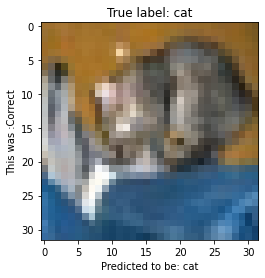

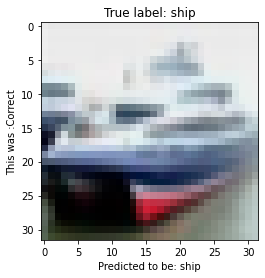

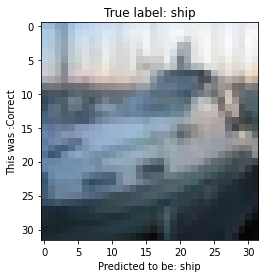

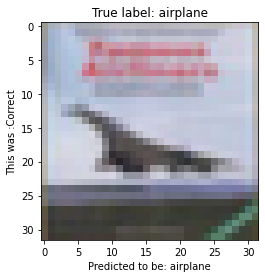

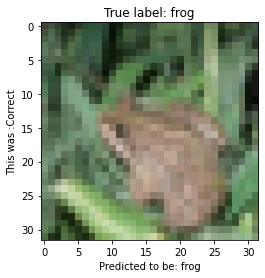

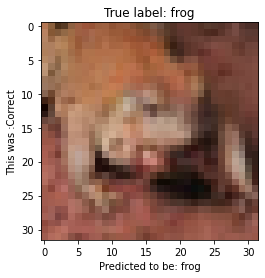

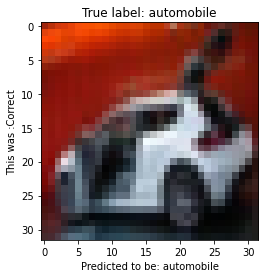

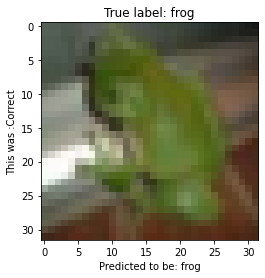

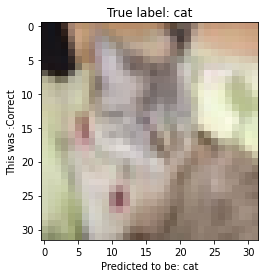

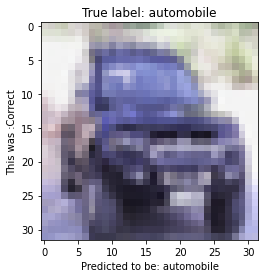

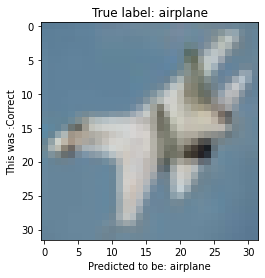

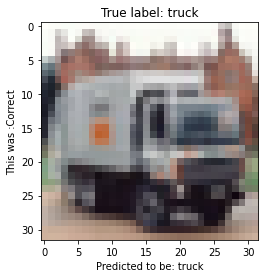

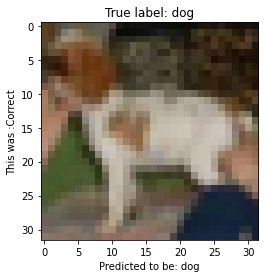

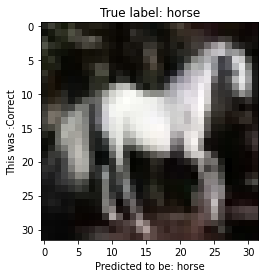

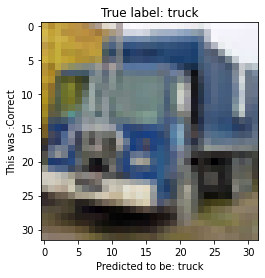

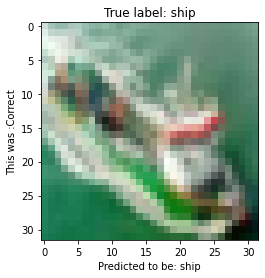

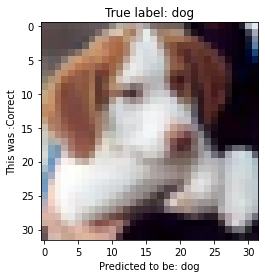

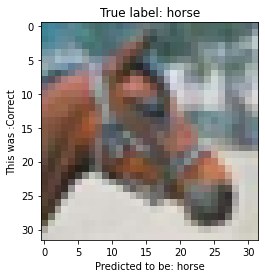

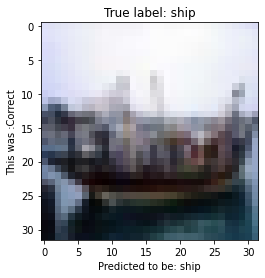

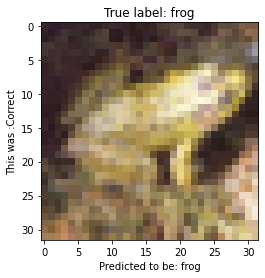

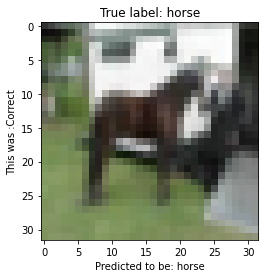

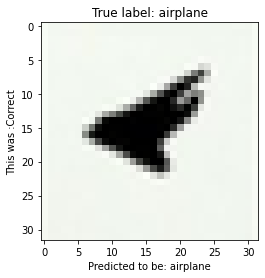

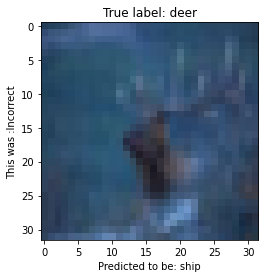

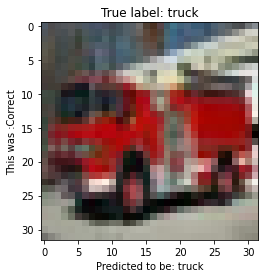

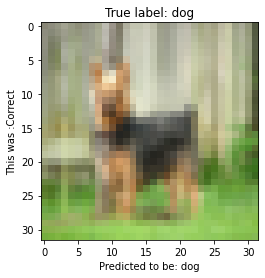

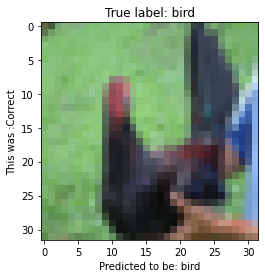

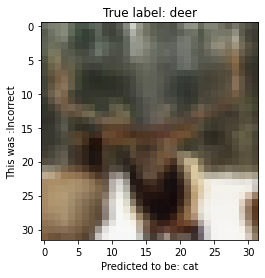

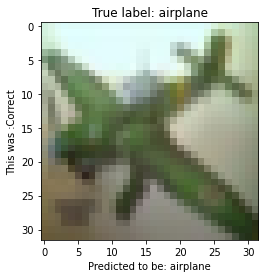

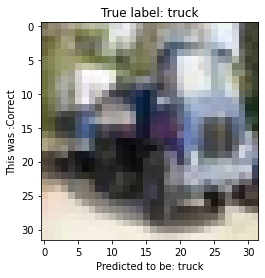

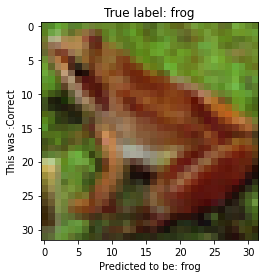

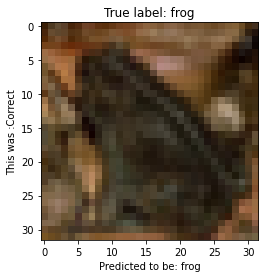

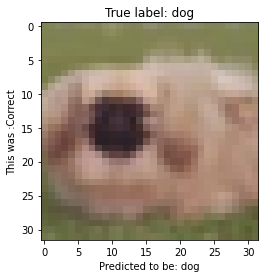

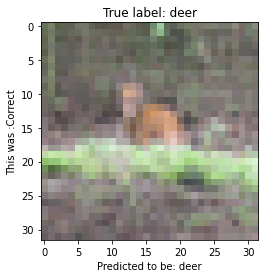

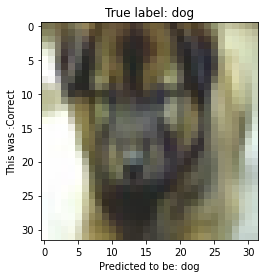

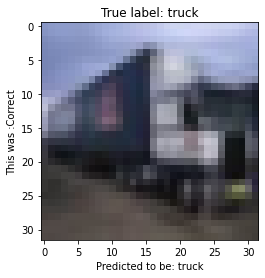

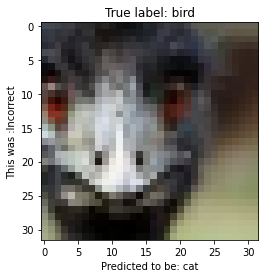

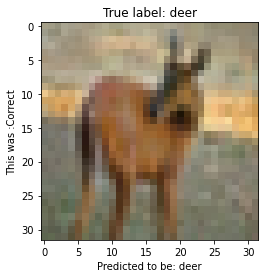

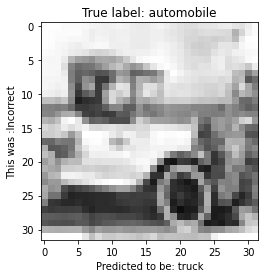

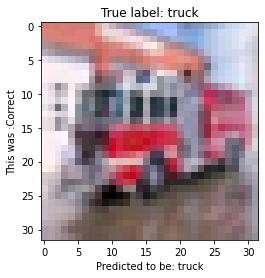

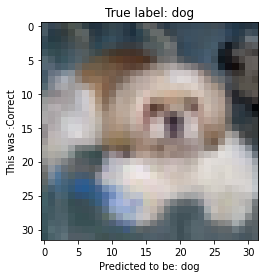

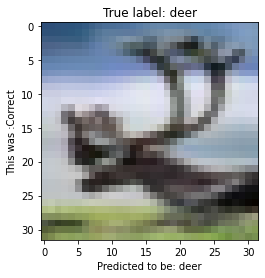

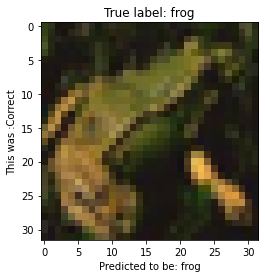

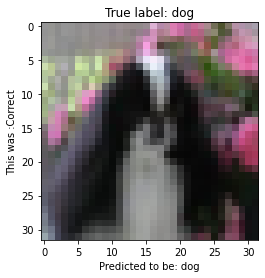

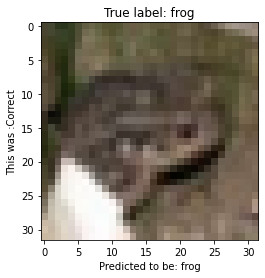

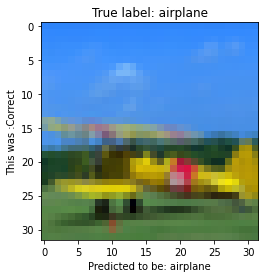

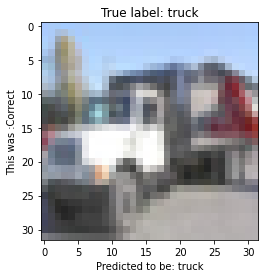

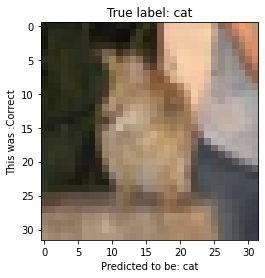

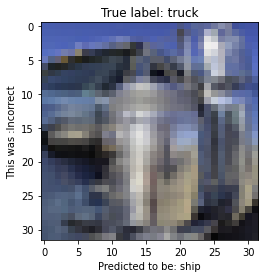

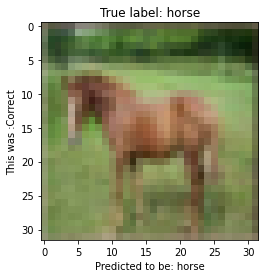

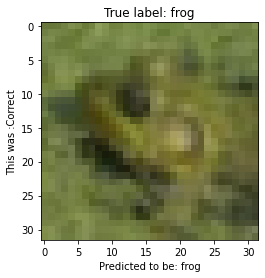

In [14]:

import numpy as np
import matplotlib.pyplot as plt
number_to_try = 50
labels_legend = ['airplane', 
                 'automobile',
                 'bird', 
                 'cat', 
                 'deer', 
                 'dog', 
                 'frog', 
                 'horse', 
                 'ship',
                 'truck']

labels_num = [np.argmax(x) for x in y_test_ohe[:number_to_try]]
labels = [labels_legend[x] for x in labels_num]

predictions_ohe = best_model_so_far_2022_02_04(x_test[:number_to_try])

predicted_class_num = [np.argmax(x) for x in  predictions_ohe]
predicted_class = [labels_legend[i] for i in predicted_class_num]

for i in range(number_to_try):
    plt.imshow(x_test[i])
    plt.title(f"True label: {labels[i]}")
    plt.xlabel(f"Predicted to be: {predicted_class[i]}")
    if labels[i] == predicted_class[i]:
        status = "Correct"
    else:
        status = "Incorrect"
    plt.ylabel(f"This was :{status}")
    plt.show()


    